<center>吐温80保留时间漂移程度</center>

m/z|theoretical retention time(min)|measured retention time(min)|delta(theoretical-measured
:-:|:-:|:-:|:-:
100.001|1|2|-1
200.12|8|11|-3

- 实测保留时间到理论保留时间的映射 
- measured ==> theoretical
- 函数

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from  functools import partial
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

%matplotlib inline

In [2]:
np.random.seed(1) # random seed
y = abs(np.random.randn(10))*10 #理论
kt,bt = 1.1,.1 
x = kt*y + bt+np.random.randn(10) #实测
df = pd.DataFrame([x,y]).T
df.columns = ['实测','理论']
df.index.name='m/z'
df.sort_values('实测')

,实测,理论
m/z,,
9,3.425889,2.493704
8,3.651644,3.190391
1,4.769180,6.117564
2,5.587472,5.281718
7,7.595417,7.612069
4,10.753253,8.654076
3,11.518600,10.729686
6,19.120501,17.448118
0,19.429907,16.243454


In [3]:
def line_(p,x):
    # 直线方程x:实测；p:参数
    k,b = p
    y_hat = k*x+b
    return y_hat

In [4]:
def error(p,x,y):
    """
    p：  待调参数parameters
    x,y： 固定参数args
    return：error 1Darray
    """
    # 待拟合函数
    y_hat = line_(p,x)
    # error
    error = y_hat - y
    return error

In [5]:
# 最小二乘优化error
p0 = (1,1) #初始化参数
res = leastsq(error,p0,args=(x,y))
line = partial(line_,res[0])

In [6]:
# mean square error
MSE = lambda y,y_hat:np.mean((y-y_hat)**2)

In [7]:
y_hat = line(x)
df['校正后'] = y_hat

In [8]:
def linear_correction(rt_theoretical,rt_measured):

    p0 = (1,1) #初始化参数
    res = leastsq(error,p0,args=(rt_measured,rt_theoretical))
    line = partial(func,res[0])
    rt_corrected = line(rt_measured)
    return rt_corrected

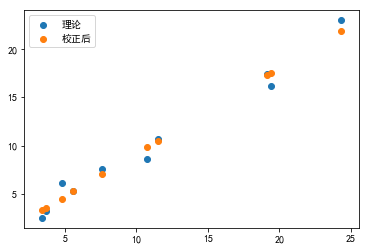

In [9]:
plt.scatter(x,y,label='理论')
plt.scatter(x,y_hat,label='校正后')
plt.legend()

In [10]:
df.sort_values('实测')

,实测,理论,校正后
m/z,,,
9,3.425889,2.493704,3.296054
8,3.651644,3.190391,3.497765
1,4.769180,6.117564,4.496284
2,5.587472,5.281718,5.227429
7,7.595417,7.612069,7.021529
4,10.753253,8.654076,9.843057
3,11.518600,10.729686,10.526895
6,19.120501,17.448118,17.319198
0,19.429907,16.243454,17.595652


In [11]:
pd.DataFrame([MSE(df['实测'],df['理论']),MSE(df['校正后'],df['理论'])],
             index=['校正前','校正后'],columns=['MSE']).T

,校正前,校正后
MSE,2.26672,0.812732


In [12]:
from scipy.optimize import leastsq

- 校正后MSE变小了